In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
df = pd.read_csv('data/aviation_cleaned.csv', index_col=0)

# condensing model names
df['model'] = df['model'].str.strip().str.replace('-', '').str.title()

# Top  model counts, Last 20 yrs in df NOT filtered by "make"

In [7]:
model_counts = df.groupby(['make', 'model']).size().reset_index(name='count')
model_counts

,make,model,count
0,177Mf Llc,Pitts Model 12,1
1,2021Fx3 Llc,Ccx2000,1
2,3Xtrim,450 Ultra,1
3,737,800,2
4,777,Ff2,1
...,...,...,...
4945,Zlin,Z50,1
4946,Zlin Aviation,Savage Cubs,1
4947,Zlin Aviation S.R.O.,Savage,1
4948,Zodiac,601Xl,1


# 4,950 unique plane models

Simply too many to evaluate

In [8]:
# top 100 recorded models in last 20 years
# lowest num_flights is 47

x = 100
top_x_models = model_counts.sort_values(by='count', ascending=False).head(x)
top_x_models.head(10)

,make,model,count
1541,Cessna,172,815
1036,Boeing,737,475
1531,Cessna,152,381
1574,Cessna,172S,328
1603,Cessna,182,318
1569,Cessna,172N,311
3929,Piper,Pa28,300
1586,Cessna,180,242
3936,Piper,Pa28140,228
1568,Cessna,172M,227


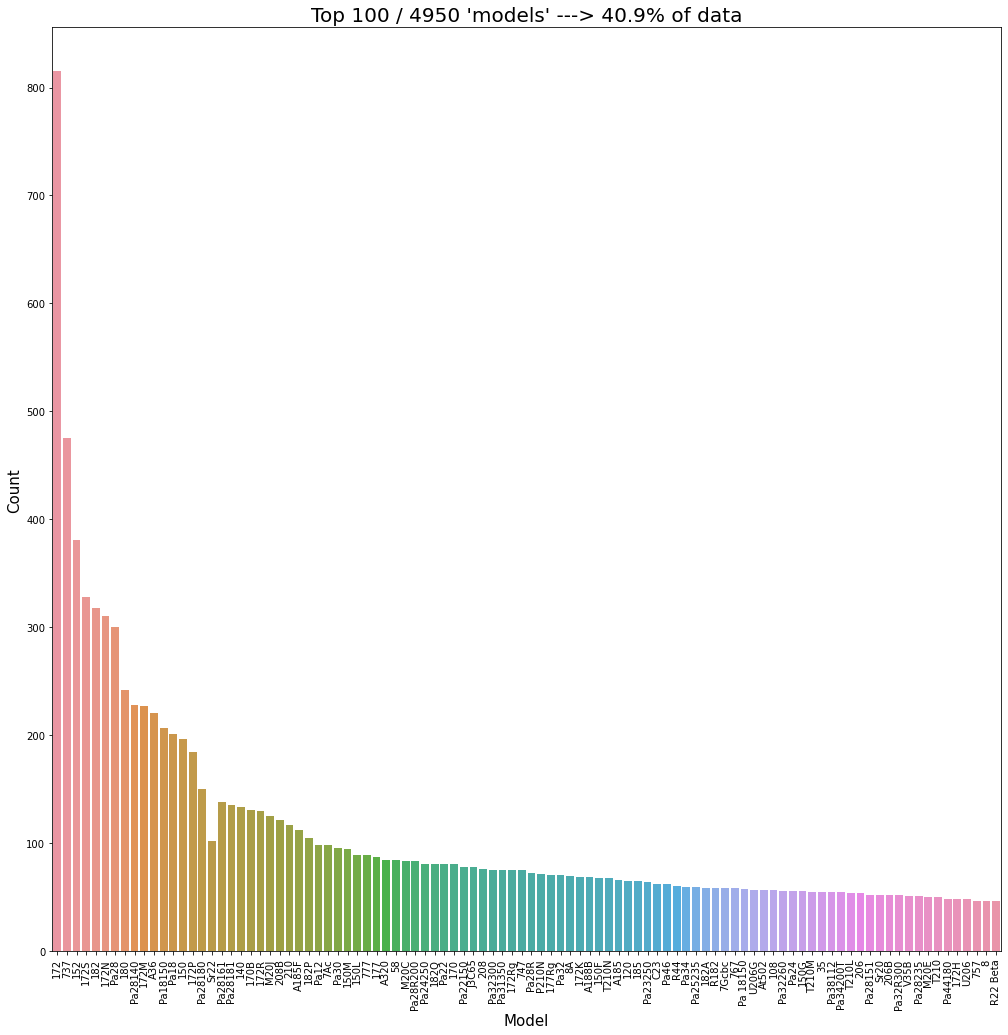

In [9]:
fig, ax = plt.subplots(figsize=(17,17))

sns.barplot(data=top_x_models, x='model', y='count', ci=None)

plt.title(f'Top {x} / {model_counts.shape[0]} \'models\' ---> {(top_x_models["count"].sum()/df.shape[0])*100:.1f}% of data', fontsize=20)
ax.set_xlabel('Model', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

plt.xticks(rotation=90)

plt.show()

# Out of top 100 most reported models in last 20 years, which ones are safest?

In [10]:
# create fatality_rate column from injury_severity percentages
top_x_models['fatality_rate'] = top_x_models['model'].map(lambda model_name: 
    df[df['model'] == model_name]['injury_severity'].value_counts(normalize=True)[0])

print('Top 20 models with lowest fatality_rate')
top_x_models = top_x_models.sort_values(by='fatality_rate')
top_x_models

Top 20 models with lowest fatality_rate


,make,model,count,fatality_rate
4008,Piper,Pa34,60,0.517
3913,Piper,Pa23250,64,0.562
693,Beech,58,85,0.564
4295,Robinson,R44,61,0.569
3999,Piper,Pa32R300,52,0.615
...,...,...,...,...
1036,Boeing,737,475,0.966
1123,Boeing,747,75,0.973
1184,Boeing,767,59,0.983
1219,Boeing,777,89,1.000


In [11]:
# thank you chatGPT
seating_capacity = [6, 2, 6, 4, 6, 6, 4, 6, 6, 9, 5, 5, 5, 5, 6, 5, 4, 6, 2, 6, 5, 4, 4, 4,6, 6, 6, 9, 6, 4, 5, 1, 6, 4, 4, 6, 
                    4, 6, 5, 2, 4, 4, 6, 2, 6, 4, 4, 5,     2, 6, 1, 2, 4, 4, 4, 4, 4, 6, 2, 4, 2, 4, 6, 4, 6, 4, 6, 4, 2, 4, 
                    4, 2,     6, 2, 4, 4, 4, 4, 2, 2, 2, 6, 4, 2, 2, 4, 2, 5, 4, 2, 4, 4, 6, 180, 4, 
                    189, 416, 216, 334, 200]

# create num_seats column
top_x_models['num_seats'] = seating_capacity
top_x_models.tail(7)

,make,model,count,fatality_rate,num_seats
314,Airbus,A320,85,0.957,180
1609,Cessna,182A,59,0.966,4
1036,Boeing,737,475,0.966,189
1123,Boeing,747,75,0.973,416
1184,Boeing,767,59,0.983,216
1219,Boeing,777,89,1.000,334
1161,Boeing,757,47,1.000,200


# Top 100 recorded planes
- 94/100 are <10 seats
- 6/100 are >100 seats

In [12]:
top_x_models.sort_values(by='num_seats').tail(10)

,make,model,count,fatality_rate,num_seats
1866,Cessna,R182,59,0.831,6
1564,Cessna,172H,49,0.840,6
1659,Cessna,208B,122,0.720,9
1658,Cessna,208,76,0.645,9
314,Airbus,A320,85,0.957,180
1036,Boeing,737,475,0.966,189
1161,Boeing,757,47,1.000,200
1184,Boeing,767,59,0.983,216
1219,Boeing,777,89,1.000,334
1123,Boeing,747,75,0.973,416


In [13]:
# add total injuries per model
for col in ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']:
    top_x_models[col] = top_x_models['model'].map(lambda model_name: 
                                         df[df['model'] == model_name][col].sum())

# add avg inj per crash
for col in ['avg_fatal_injuries', 'avg_serious_injuries', 'avg_minor_injuries', 'avg_uninjured']:
    top_x_models[col] = top_x_models['total'+col[3:]] / top_x_models['count']

top_x_models.sort_values(by='num_seats').tail(10)

,make,model,count,fatality_rate,num_seats,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,avg_fatal_injuries,avg_serious_injuries,avg_minor_injuries,avg_uninjured
1866,Cessna,R182,59,0.831,6,20,9,2,76,0.339,0.153,0.034,1.288
1564,Cessna,172H,49,0.840,6,11,8,20,59,0.224,0.163,0.408,1.204
1659,Cessna,208B,122,0.720,9,119,75,111,301,0.975,0.615,0.910,2.467
1658,Cessna,208,76,0.645,9,96,35,53,237,1.263,0.461,0.697,3.118
314,Airbus,A320,85,0.957,180,283,11,13,4457,3.329,0.129,0.153,52.435
1036,Boeing,737,475,0.966,189,1348,383,84,24365,2.838,0.806,0.177,51.295
1161,Boeing,757,47,1.000,200,0,9,4,3725,0.000,0.191,0.085,79.255
1184,Boeing,767,59,0.983,216,3,64,19,5591,0.051,1.085,0.322,94.763
1219,Boeing,777,89,1.000,334,0,27,23,9414,0.000,0.303,0.258,105.775
1123,Boeing,747,75,0.973,416,6,72,6,2478,0.080,0.960,0.080,33.040


In [14]:
# function to get normalized aircraft_damage value counts for each model
def get_damage_distribution(model):
    df_new = df[df['model'] == model]
    
    return df_new['aircraft_damage'].value_counts(normalize=True)

In [15]:
# adding normalized damage distributions for each model
damage_df = top_x_models['model'].apply(get_damage_distribution)
top_x_models = pd.concat([top_x_models, damage_df], axis=1)

# replace nan with 0
top_x_models = top_x_models.fillna(0)

# Have a df with basically all the safety data we can wrangle on the top 100 recorded models since 2003

- time to make some plots :D

In [16]:
# for the BIG BOYS
# can't really use damage classification as each has over 
commercial_planes = top_x_models.sort_values(by='num_seats').tail(6)
commercial_planes['make_model'] = commercial_planes['make'] + ' ' + commercial_planes['model']
commercial_planes

,make,model,count,fatality_rate,num_seats,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,avg_fatal_injuries,avg_serious_injuries,avg_minor_injuries,avg_uninjured,Substantial,Destroyed,Unknown,Minor,make_model
314,Airbus,A320,85,0.957,180,283,11,13,4457,3.329,0.129,0.153,52.435,0.043,0.043,0.793,0.120,Airbus A320
1036,Boeing,737,475,0.966,189,1348,383,84,24365,2.838,0.806,0.177,51.295,0.143,0.032,0.566,0.259,Boeing 737
1161,Boeing,757,47,1.000,200,0,9,4,3725,0.000,0.191,0.085,79.255,0.191,0.000,0.574,0.234,Boeing 757
1184,Boeing,767,59,0.983,216,3,64,19,5591,0.051,1.085,0.322,94.763,0.186,0.034,0.525,0.254,Boeing 767
1219,Boeing,777,89,1.000,334,0,27,23,9414,0.000,0.303,0.258,105.775,0.112,0.011,0.562,0.315,Boeing 777
1123,Boeing,747,75,0.973,416,6,72,6,2478,0.080,0.960,0.080,33.040,0.147,0.027,0.387,0.440,Boeing 747


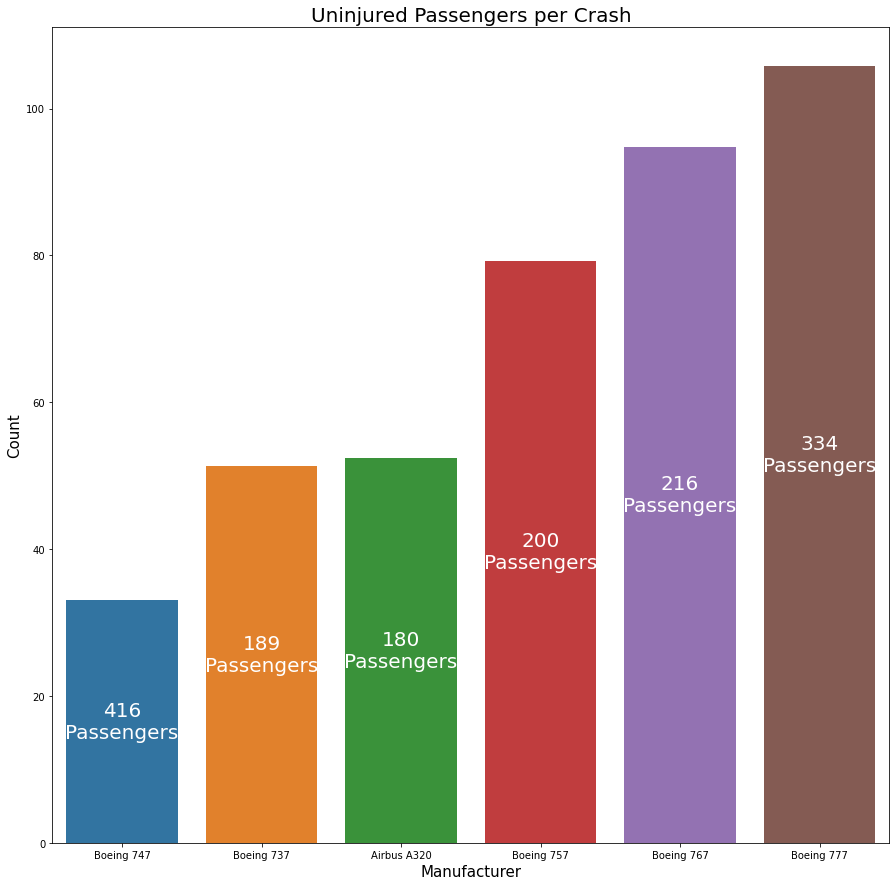

In [17]:
fig, ax =plt.subplots(figsize=(15,15))

sorted_data = commercial_planes.sort_values(by='avg_uninjured')
sns.barplot(data=sorted_data, x='make_model', y='avg_uninjured', ax=ax)

ax.set_title('Uninjured Passengers per Crash', fontsize=20)
ax.set_xlabel('Manufacturer', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

for bar, num_seats in zip(ax.patches, sorted_data['num_seats']):
    ax.annotate(text=str(num_seats) + '\nPassengers', 
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2),
                ha='center', va='center', color='white', fontsize=20)


# Boeing 737 takes the cake

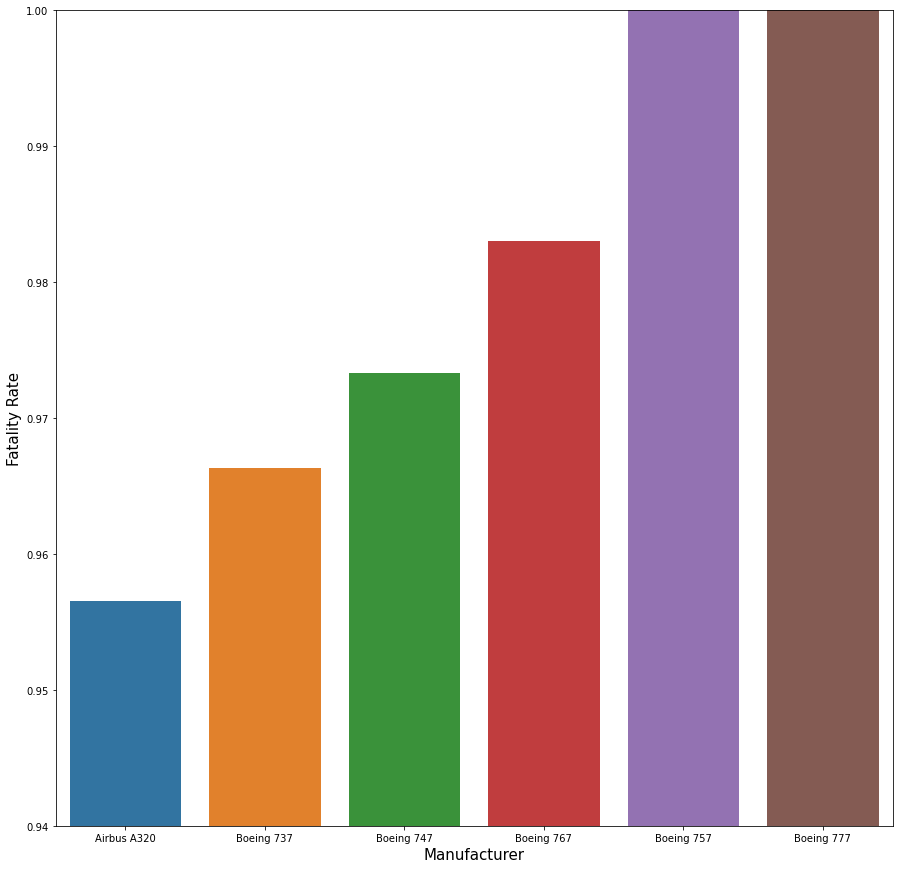

In [18]:
fig, ax =plt.subplots(figsize=(15,15))

sorted_data = commercial_planes.sort_values(by='fatality_rate')
sns.barplot(data=sorted_data, x='make_model', y='fatality_rate', ax=ax)

# ax.set_title('Uninjured Passengers per Crash', fontsize=20)
ax.set_xlabel('Manufacturer', fontsize=15)
ax.set_ylabel('Fatality Rate', fontsize=15)

ax.set_ylim(0.94, 1.0);

In [282]:
# too many unique makes
(f'Total planes: {df.shape[0]}, Unique makes: {df["make"].nunique()}')

'Total planes: 26983, Unique makes: 1290'

In [283]:
# 1290 plane manufacturers is simply too many to analyze
df['make'].value_counts().head(20)

Cessna                8711
Piper                 4901
Beech                 1849
Boeing                1526
Mooney                 471
Air Tractor            287
Airbus                 266
Bellanca               264
Maule                  248
Bell                   231
Aeronca                229
Cirrus Design Corp     223
Air Tractor Inc        219
Grumman                187
Embraer                182
Champion               180
Robinson               176
Luscombe               164
Stinson                154
North American         150
Name: make, dtype: int64

# Overview of the data we're working with:

- Every data point/row represents an occurence of an aviation accident
- 2003-2022 (last 20 years)
- No 'amateur_built' planes


In [284]:
# find at what percent each make occurs in df
norm_counts = df['make'].value_counts(normalize=True).values
(f'Top 20 makes = {norm_counts[:20].sum() * 100:.2f}% of data')

'Top 20 makes = 76.41% of data'

In [ ]:
unneeded_rows = df[df['purpose_of_flight'].isin(['Skydiving'])]
df = df.drop(unneeded_rows.index)

commercial = ['Business', 'Ferry', 'Executive/corporate', 'Flight Test']
private = ['Personal', 'Instructional', 'Positioning', 'Aerial Observation']
work = ['Aerial Application', 'Other Work Use', 'Public Aircraft', 'Public Aircraft - Federal', 'Public Aircraft - State', 
        'Public Aircraft - Local', 'Firefighting']

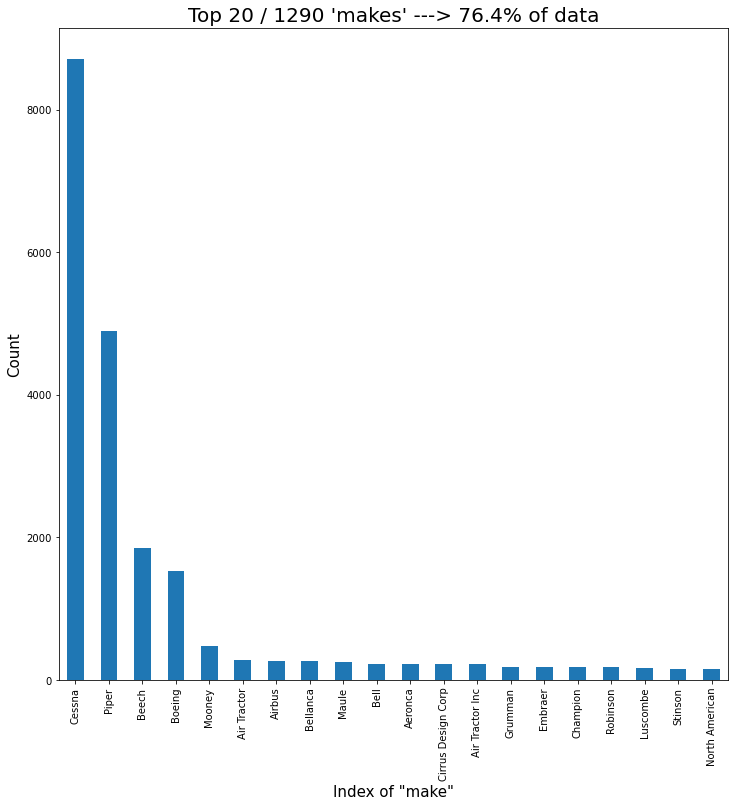

In [81]:
num_makes = 20
top_20_makes = df['make'].value_counts().head(num_makes)

top_20_makes.plot(kind='bar', figsize=(12,12))

plt.title(f'Top {num_makes} / {df["make"].nunique()} \'makes\' ---> {(top_20_makes.sum()/df["make"].value_counts().sum())*100:.1f}% of data', fontsize=20)
plt.xlabel('Index of "make"', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

# Going from top 20 -> top 7 only goes from 76% -> 67% of data

- Taking top 7 so we have representation from all 3 business categories.\
- Represents right at 2/3 of our data from last 20 years

In [84]:
top_7_index = df['make'].value_counts().index[:7]
top_7_values = df['make'].value_counts().values[:7]

(f'Top 7 makes = {norm_counts[:7].sum() * 100:.2f}% of data')

'Top 7 makes = 66.75% of data'

In [88]:
# this df only contains accidents from the top 7 manufacturers
top_7_makes = df[df['make'].isin(top_7_index)]
top_7_makes.head()

,investigation_type,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,year
0,Accident,"TUCSON, AZ",United States,fatal,Destroyed,Unknown,Beech,95,2,Reciprocating,Personal,1,3,0,0,VMC,Takeoff,2003
5,Accident,"JESSUP, GA",United States,non-fatal,Substantial,Unknown,Cessna,150K,1,Reciprocating,Personal,0,0,0,1,VMC,Cruise,2003
6,Accident,"MC ALLEN, TX",United States,non-fatal,Substantial,Unknown,Cessna,401,2,Reciprocating,Personal,0,0,0,1,VMC,Cruise,2003
7,Accident,"ALTON, IL",United States,non-fatal,Substantial,Unknown,Cessna,182S,1,Reciprocating,Instructional,0,0,0,1,VMC,Takeoff,2003
9,Accident,"Santo Domingo, Dominican Republic",Dominican Republic,fatal,Destroyed,Airplane,Beech,Be-60,0,Unknown,Personal,1,1,0,0,VMC,Unknown,2003


# Condensing the large group of df['make'] (plane manufacturer)

- Need to classify the 27000 planes that I have as Private, Commercial, or Work using the 'purpose of flight' column

- Commercial: Large-scale planes that hold many passengers (like the ones used at normal airports).

- Private: Smaller planes for business travels (like private jets).

- Work: Well-rounded planes made for specific tasks (crop-dusting, firefighting, etc).

In [58]:
df['purpose_of_flight'].value_counts(normalize=True)
print('Taking a look at purpose_of_flight for Cessna:')
df[df['make'] == 'Cessna'][['purpose_of_flight']].value_counts()

Personal                    0.536
Unknown                     0.191
Instructional               0.125
Aerial Application          0.044
Business                    0.026
Positioning                 0.020
Other Work Use              0.010
Aerial Observation          0.008
Flight Test                 0.006
Ferry                       0.005
Executive/corporate         0.005
Skydiving                   0.005
Public Aircraft             0.004
Banner Tow                  0.004
Public Aircraft - Federal   0.003
Air Race show               0.002
Glider Tow                  0.002
Public Aircraft - State     0.001
Air Race/show               0.001
Firefighting                0.001
Public Aircraft - Local     0.001
External Load               0.001
ASHO                        0.000
Air Drop                    0.000
PUBS                        0.000
Name: purpose_of_flight, dtype: float64

# model -> purpose

- take top 5 highest-frequency models from each make
- map each model to most common purpose_of_flight
- map those purposes to one category in [commercial, private, work]

In [91]:
print(f'top_7_makes.shape: {top_7_makes.shape} -> 18k plane crashes to analyze')

top_7_makes.shape: (18011, 18) -> 18k plane crashes to analyze


In [101]:
top_7_makes[top_7_makes['make'] == 'Airbus']['model'].value_counts()

A320          84
A330          32
A321          20
A319          16
A300          10
              ..
A330 - 203     1
A330 - 301     1
A320 233       1
220            1
330            1
Name: model, Length: 66, dtype: int64

In [110]:
# df to hold top 5 models from each of top 7 makes
groups = top_7_makes.groupby(['make', 'model']).size().reset_index(name='count')
models_df = groups.groupby('make').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
models_df

,make,model,count
0,Air Tractor,At502,39
1,Air Tractor,At-502B,27
2,Air Tractor,At-301,26
3,Air Tractor,At802,21
4,Air Tractor,At-602,19
5,Airbus,A320,84
6,Airbus,A330,32
7,Airbus,A321,20
8,Airbus,A319,16
9,Airbus,A300,10


# Investigating the safety of these top 7 makes
- avg injury severity
- avg [fatal, serious, minor]

In [30]:
# get counts for each of the top 7 makes
make_counts = df['make'].value_counts()[:7].reset_index()
make_counts.columns = ['make', 'num_flights']
make_counts

,make,num_flights
0,Cessna,8711
1,Piper,4901
2,Beech,1849
3,Boeing,1526
4,Mooney,471
5,Air Tractor,287
6,Airbus,266


In [31]:
# calculate average injuries for each unique plane
cols = ['total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured', 'number_of_engines']
makes_stats = top_7_makes.groupby('make')[cols].mean().reset_index()

# rename to 'avg'
makes_stats.columns = ['make', 'avg_fatal_injuries', 'avg_serious_injuries', 'avg_minor_injuries', 'avg_uninjured', 'avg_num_engines']

# merge with make_counts to add num_flights
makes_stats = makes_stats.merge(make_counts, on='make', how='left')

print('Average stats for top 7 makes:')
makes_stats

NameError: name 'top_7_makes' is not defined

In [32]:
# reshape df to long format
df_long = makes_stats.melt(id_vars='make',
                  value_vars=['avg_fatal_injuries', 'avg_serious_injuries', 'avg_minor_injuries'],
                  var_name='injury_type',
                  value_name='average')


fig, ax =plt.subplots(figsize=(12,12))

sns.barplot(data=df_long, x='make', y='average', hue='injury_type', ax=ax)

ax.set_title('Average Injuries per Crash', fontsize=20)
ax.set_xlabel('Manufacturer', fontsize=15)
ax.set_ylabel('Injuries', fontsize=15);

NameError: name 'makes_stats' is not defined

### The above graphic does not take into account num_passengers per flight/accident

- Boeing has highest injury counts per accident but also has highest uninjured count (by far). This means boeing planes are predominantly large, commercial vessels.
- Cessna has lowest injury statistics per crash. Piper is close second.

# The 4 most recorded plane manufacturers (by far) in terms of accident reports are:

- Cessna
- Piper
- Beech
- Boeing

## Goal: Find top 10 safest models per make

# Question: How do we quantify "safety"? (without num_passengers)

- Using avg total_injury vals
- Low (avg_fatal or avg_serious) should up the 'safety score'. High values would lower the score.
- Opposite is true for (avg_minor or avg_uninjured)
- aircraft_damage is another factor

In [20]:
# new dataframe only holding 17k rows of top 4 makes
df_top_4 = df[df['make'].isin(['Cessna', 'Piper', 'Beech', 'Boeing'])]
df_top_4.shape

(17034, 23)

In [21]:
df_top_4['aircraft_damage'].unique()

array(['Destroyed', 'Substantial', 'Unknown', 'Minor'], dtype=object)

In [22]:
damage_df = makes_stats['make'].apply(get_damage_distribution)

# adding 4 columns showing normalized count (percent) of each category of aircraft damage
makes_stats = pd.concat([makes_stats, damage_df], axis=1)
makes_stats.shape

(4, 11)

In [23]:
# cleaning up makes_stats
makes_stats = makes_stats[['make', 'num_flights', 'avg_fatal_injuries', 'avg_serious_injuries', 
                           'avg_minor_injuries', 'avg_uninjured', 'Destroyed', 'Substantial', 'Minor', 'Unknown']]
makes_stats

,make,num_flights,avg_fatal_injuries,avg_serious_injuries,avg_minor_injuries,avg_uninjured,Destroyed,Substantial,Minor,Unknown
0,Beech,1853,0.772,0.241,0.199,1.273,0.209,0.740,0.026,0.024
1,Boeing,1548,2.660,0.923,0.339,71.176,0.041,0.225,0.248,0.485
2,Cessna,8723,0.391,0.225,0.189,1.232,0.117,0.848,0.014,0.021
3,Piper,4910,0.450,0.207,0.185,1.106,0.136,0.836,0.013,0.015


# Observations
- Hard to judge the injury numbers without knowing avg_passenger_count. Would need to look at specific models for each make to gain this insight.

- 25% of Boeing accident were classified as "Minor". This is much higher than the 3 private makes. Would be interested at comparing this number to __other commercial (large) planes__.
- Beech has a 21% "Destroyed" rate AND a 74% "Substantial" rate. __Significantly worse than Cessna and Piper__.
- Cessna and Piper are very comparable accross the board.

# 3 categories of aircraft_damage:

- Minor
- Substantial
- Destroyed

In [236]:
df_cessna = df_top_4[df_top_4['make'] == 'Cessna']
df_piper = df_top_4[df_top_4['make'] == 'Piper']
df_beech = df_top_4[df_top_4['make'] == 'Beech']
df_boeing = df_top_4[df_top_4['make'] == 'Boeing']

for df, name in zip([df_cessna, df_piper, df_beech, df_boeing], ['Cessna', 'Piper', 'Beech', 'Boeing']):
    print(f'df_{name} shape: {df.shape}, Num of unique models: {df["model"].nunique()}')

df_Cessna shape: (8723, 23), Num of unique models: 451
df_Piper shape: (4910, 23), Num of unique models: 373
df_Beech shape: (1853, 23), Num of unique models: 272
df_Boeing shape: (1548, 23), Num of unique models: 311


In [214]:
df_top_4['aircraft_damage'].value_counts(normalize=True)

Substantial    0.776095
Destroyed      0.125572
Unknown        0.061994
Minor          0.036339
Name: aircraft_damage, dtype: float64

In [283]:
df_cessna['aircraft_damage'].value_counts(normalize=True).values

array([0.84764416, 0.11670297, 0.02143758, 0.01421529])

In [216]:
df_piper['aircraft_damage'].value_counts(normalize=True)

Substantial    0.836049
Destroyed      0.136253
Unknown        0.015071
Minor          0.012627
Name: aircraft_damage, dtype: float64

In [217]:
df_beech['aircraft_damage'].value_counts(normalize=True)

Substantial    0.740421
Destroyed      0.209390
Minor          0.026444
Unknown        0.023745
Name: aircraft_damage, dtype: float64

In [218]:
df_boeing['aircraft_damage'].value_counts(normalize=True)

Unknown        0.485142
Minor          0.248062
Substantial    0.225452
Destroyed      0.041344
Name: aircraft_damage, dtype: float64

In [238]:
df_cessna['model'].value_counts()

172            816
152            381
172S           327
182            318
172N           311
              ... 
T182 - T         1
U-206G           1
F177Rg           1
C175A            1
Skyhawk 172      1
Name: model, Length: 451, dtype: int64